In [14]:
!wget -q https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/notMNIST_small.tar.gz
!tar -xzf notMNIST_small.tar.gz

In [15]:
# 이미지 읽어서 데이터 준비하기
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

paths = glob.glob('./notMNIST_small/*/*.png')
paths = np.random.permutation(paths)
독립 = np.array([plt.imread(paths[i]) for i in range(len(paths))])
종속 = np.array([paths[i].split('/')[-2] for i in range(len(paths))])
print(독립.shape, 종속.shape)

(18724, 28, 28) (18724,)


In [17]:
종속[0:10]

array(['F', 'B', 'E', 'A', 'E', 'J', 'H', 'I', 'I', 'J'], dtype='<U1')

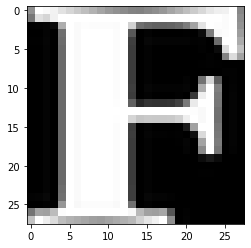

In [18]:
plt.imshow(독립[0], cmap='gray')

In [21]:
독립 = 독립.reshape(18724, 28, 28, 1) # convolutino layer는 이미지 하나의 shape가 3차원 모양이어야 하기 때문에
종속 = pd.get_dummies(종속)
print(독립.shape, 종속.shape)

(18724, 28, 28, 1) (18724, 10)


In [22]:
# 모델을 완성합니다.
X = tf.keras.layers.Input(shape=[28, 28, 1])

H = tf.keras.layers.Conv2D(6, kernel_size=5, padding='same', activation='swish')(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)

H = tf.keras.layers.Dense(120)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

H = tf.keras.layers.Dense(84)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [23]:
# 모델을 학습한다.
model.fit(독립, 종속, epochs=10)

Epoch 1/10
586/586 [==============================] - 6s 7ms/step - loss: 0.5928 - accuracy: 0.8337
Epoch 2/10
586/586 [==============================] - 4s 7ms/step - loss: 0.2508 - accuracy: 0.9225
Epoch 3/10
586/586 [==============================] - 4s 7ms/step - loss: 0.1916 - accuracy: 0.9409
Epoch 4/10
586/586 [==============================] - 4s 7ms/step - loss: 0.1523 - accuracy: 0.9533
Epoch 5/10
586/586 [==============================] - 4s 7ms/step - loss: 0.1270 - accuracy: 0.9592
Epoch 6/10
586/586 [==============================] - 4s 7ms/step - loss: 0.1069 - accuracy: 0.9664
Epoch 7/10
586/586 [==============================] - 5s 8ms/step - loss: 0.0880 - accuracy: 0.9709
Epoch 8/10
586/586 [==============================] - 4s 8ms/step - loss: 0.0803 - accuracy: 0.9748
Epoch 9/10
586/586 [==============================] - 4s 7ms/step - loss: 0.0663 - accuracy: 0.9796
Epoch 10/10
586/586 [==============================] - 4s 7ms/step - loss: 0.0576 - accuracy: 0.9803

In [24]:
# 모델을 이용한다.
pred = model.predict(독립[0:5])
pd.DataFrame(pred).round(2)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# 정답 확인
종속[0:5]

,A,B,C,D,E,F,G,H,I,J
0,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0


In [26]:
# 모델 확인
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               4812